## Sentiment Analysis Part 3: Word2Vec 

Useful links: \
https://www.kaggle.com/code/chayan8/sentiment-analysis-using-bert-pytorch \
https://pytorch.org/tutorials/ \
https://www.datacamp.com/tutorial/building-a-transformer-with-py-torch \
https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

### Loading data, divide data into train and test

In [1]:
import pandas as pd
import gensim
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
data_1 = pd.read_csv("data/clean_unlabeled.csv")  # this file has been converted into .csv and line 11 has to manually edited due to conversion errors

In [3]:
data_1["review"] = data_1["review"].to_list()
data_1["review"] = data_1["review"].str.split(' ')

In [4]:
model = gensim.models.Word2Vec(data_1['review'], min_count=1, workers=4)

In [5]:
model.build_vocab(data_1["review"], progress_per=10000)

In [6]:
model.train(data_1["review"], total_examples=model.corpus_count, epochs=30)

(263948813, 346905150)

In [7]:
model = gensim.models.Word2Vec.load("word2vec.model")   # for loading a pretrained model

In [8]:
model.wv.most_similar("terrific")

[('fantastic', 0.8865101337432861),
 ('superb', 0.8602558374404907),
 ('great', 0.8574594855308533),
 ('brilliant', 0.8420773148536682),
 ('wonderful', 0.8393755555152893),
 ('fine', 0.8142338991165161),
 ('marvelous', 0.8008696436882019),
 ('fabulous', 0.7949454188346863),
 ('phenomenal', 0.7619895339012146),
 ('outstanding', 0.754912793636322)]

In [9]:
model.wv.similarity("france", "queen")

0.27309066

In [10]:
model.save("word2vec.model")

### Visualizing the results

In [11]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [12]:
n = 20
array = [model.wv.most_similar("terrific", topn=n)[i][0] for i in range(n)] + ["terrific"] + [model.wv.most_similar("horrible", topn=n)[i][0] for i in range(n)] + ["horrible"] + [model.wv.most_similar("positive", topn=n)[i][0] for i in range(n)] + ["positive"]
#print(array)
labels = [0 for i in range(n+1)] + [1 for i in range(n+1, 2*n+2)] + [2 for i in range(2*n+2, 3*n+3)]
nodes = np.array([model.wv.get_vector(i) for i in array])

In [13]:
tsne = TSNE(n_components=2, perplexity=5, init="pca", random_state=0).fit_transform(nodes)

In [14]:
pca = PCA(n_components=2).fit_transform(nodes)

Text(0.5, 1.0, 'IMDB Movie Review PCA visualization')

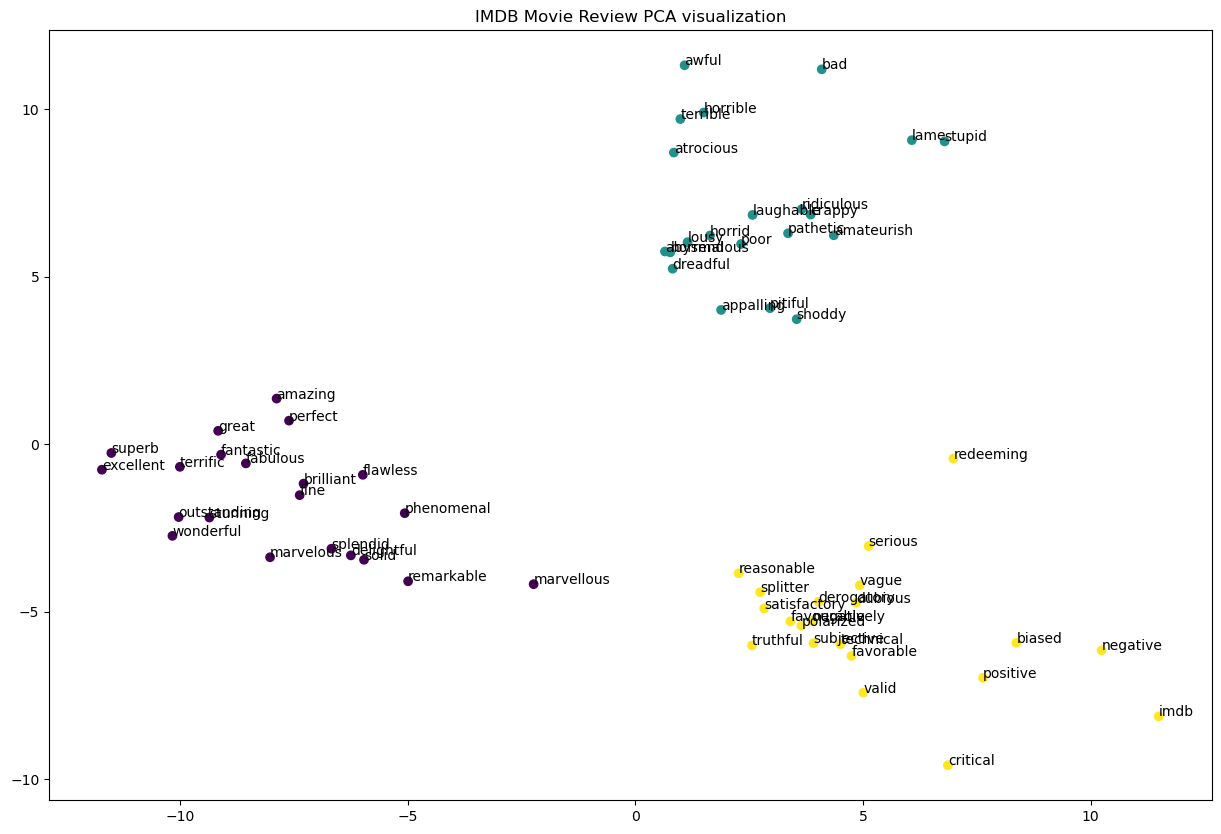

In [15]:
plt.figure(figsize=(15,10))
for i in range(len(array)):
    plt.annotate(array[i], xy=(pca[i,0], pca[i,1]), xytext=(pca[i,0], pca[i,1]))
plt.scatter(pca[:,0], pca[:,1], c=labels)
plt.title("IMDB Movie Review PCA visualization")
#plt.savefig("PCA_plot.svg")

Text(0.5, 1.0, 'IMDB Movie Review TSNE visualization')

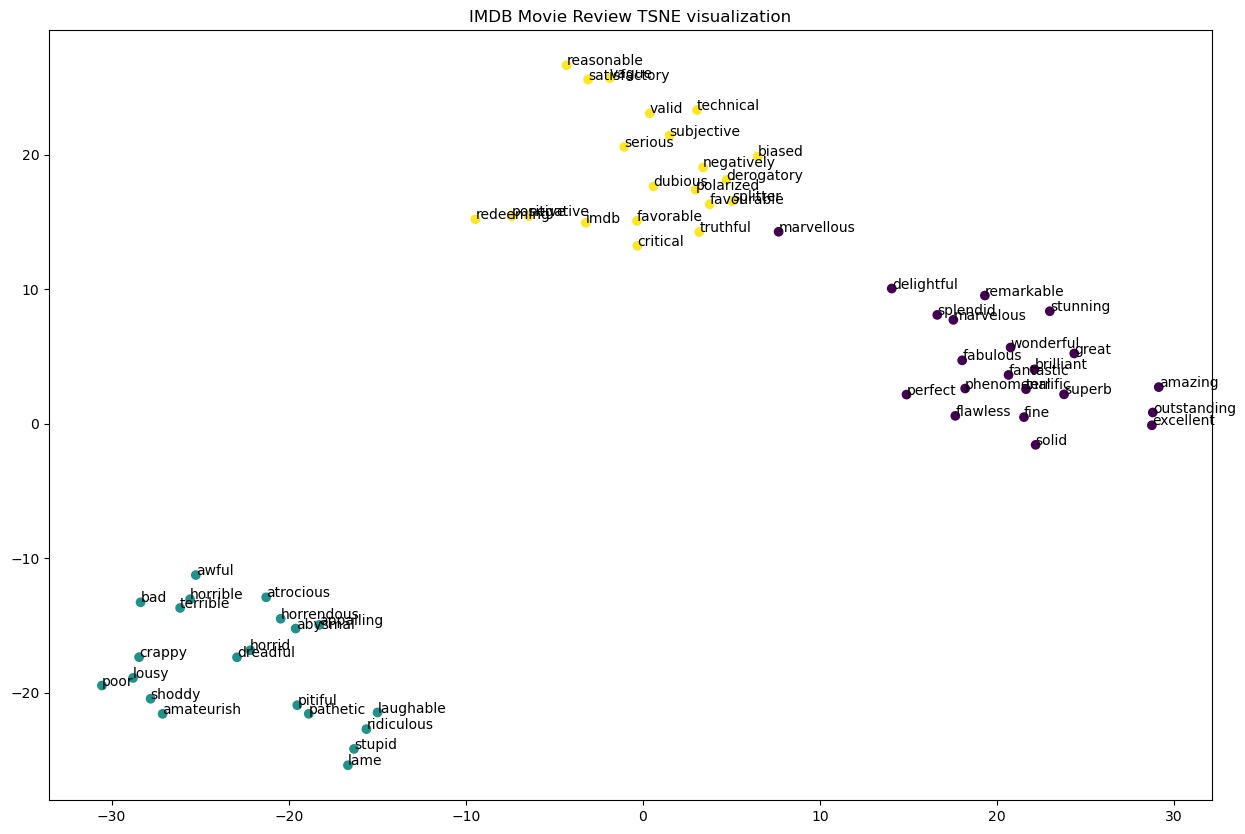

In [16]:
plt.figure(figsize=(15,10))
for i in range(len(array)):
    plt.annotate(array[i], xy=(tsne[i,0], tsne[i,1]), xytext=(tsne[i,0], tsne[i,1]))
plt.scatter(tsne[:,0], tsne[:,1], c=labels)
plt.title("IMDB Movie Review TSNE visualization")
#plt.savefig("TSNE_plot.svg")